In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

RDKit WARNING: [16:30:04] Enabling RDKit 2019.09.3 jupyter extensions


Mým targetem je tyrosinkinázový receptor epidermálního růstového faktoru (erbB1), který má v CheMBLU přes 10k IC50 hodnot.
https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL203/

List látek jsem stáhl v podobě .csv   Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv
https://www.ebi.ac.uk/chembl/g/#browse/activities/filter/target_chembl_id%3ACHEMBL203%20AND%20standard_type%3A(%22IC50%22)

In [2]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]
rawdata[0]

OrderedDict([('Molecule ChEMBL ID', 'CHEMBL332612'),
             ('Molecule Name', ''),
             ('Molecule Max Phase', '0'),
             ('Molecular Weight', '351.80'),
             ('#RO5 Violations', '0'),
             ('AlogP', '4.08'),
             ('Compound Key', '17'),
             ('Smiles', 'Nc1ccc(Nc2[nH]nc3ncnc(Nc4cccc(Cl)c4)c23)cc1'),
             ('Standard Type', 'IC50'),
             ('Standard Relation', "'='"),
             ('Standard Value', '500.0'),
             ('Standard Units', 'nM'),
             ('pChEMBL Value', '6.30'),
             ('Data Validity Comment', ''),
             ('Comment', ''),
             ('Uo Units', 'UO_0000065'),
             ('Ligand Efficiency BEI', ''),
             ('Ligand Efficiency LE', ''),
             ('Ligand Efficiency LLE', ''),
             ('Ligand Efficiency SEI', ''),
             ('Potential Duplicate', 'False'),
             ('Assay ChEMBL ID', 'CHEMBL621022'),
             ('Assay Description',
              'Inh

In [3]:
lig_IDS = [x['Molecule ChEMBL ID'] for x in rawdata]
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

In [4]:
len(lig_IDS), len(lig_MOLECULES)

(12496, 12496)

In [5]:
[x for x in lig_MOLECULES if not x]

[]

Po načtení dat jsem definoval lig_IDS a lig_MOLECULES, do kterých jsem vložil identifikátory a struktury látek a kontrola mě prokázala načtení všech molekul

In [6]:
lig_RINGS = [Chem.GetSSSR(x) for x in lig_MOLECULES]

In [7]:
lig_RINGS[:25]

[4, 2, 4, 6, 3, 5, 4, 3, 3, 4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 1, 1, 3]

lig_RINGS s počty kruhů všech látek

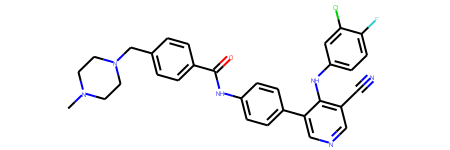

In [8]:
lig_MOLECULES[5]

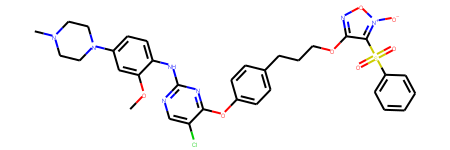

In [9]:
lig_MOLECULES[3]

Funguje to! :D

In [10]:
sum(lig_RINGS)/len(lig_MOLECULES)

3.9162131882202305

I přes vysoký počet molekul je průměrný počet cyklů na molekulu celkem vysoký (téměř 4) což nasvědčuje na komplikovanější struktury ligandů. Uvidíme jaké informace přinesou další cvičení.